In [12]:
import requests
import pandas as pd
import numpy as np
import ta
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from joblib import load
import random

# Función para obtener datos de Alpha Vantage hasta la hora actual
def fetch_data(symbol, api_key, start_date, end_date=None, interval='1min'):
    if end_date is None:
        end_date = datetime.now().strftime('%Y-%m-%d')
        
    # Aquí va la lógica para obtener los datos en tiempo real utilizando la API de Alpha Vantage
    # Puedes usar la biblioteca requests para hacer la solicitud a la API y procesar la respuesta
    # Te recomiendo consultar la documentación de Alpha Vantage para conocer los detalles de cómo hacer la solicitud
    
    # Implementación de la función...
    pass

# Función para calcular indicadores técnicos
def calculate_indicators(data):
    # Implementación de la función...
    pass

# Función para preparar los datos para el modelo
def prepare_data(data):
    # Implementación de la función...
    pass

# Función para tomar decisiones de trading
def make_decision(data):
    # Implementación de la función...
    pass

# Función para obtener la fecha y hora actuales en formato de Alpha Vantage
def current_datetime():
    # Implementación de la función...
    pass

# Función para predecir el movimiento de las próximas 15 minutos
def predict_next_15_minutes(symbol, api_key):
    # Aquí es donde entrenarías tu modelo de machine learning y harías la predicción
    # Por ahora, simplemente devolvemos una predicción aleatoria
    prediction = random.choice(['alza', 'baja', 'sin cambios'])
    return prediction

def load_model():
    """
    Carga el modelo de aprendizaje automático guardado.
    """
    return load('path/to/your/saved/model.joblib')

def main():
    api_key = 'YYYC6JRUF7KDUUZR'  # Reemplaza con tu propia clave
    symbol = 'AUS200'  # Símbolo del índice AUS200

    # Predecir el movimiento de las próximas 15 minutos
    prediction = predict_next_15_minutes(symbol, api_key)
    if prediction is not None:
        print("Predicción para los próximos 15 minutos:", prediction)
    else:
        print("No se pudo realizar la predicción.")

if __name__ == "__main__":
    main()


Predicción para los próximos 15 minutos: sin cambios


[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_23034/2379946564.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_23034/2379946564.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Últimos datos descargados del índice NASDAQ-100:
                    Open          High           Low         Close  \
Date                                                                 
2024-04-05  17940.279297  18202.960938  17912.859375  18108.460938   
2024-04-08  18130.439453  18178.660156  18050.689453  18100.189453   
2024-04-09  18188.869141  18210.019531  17973.070312  18169.900391   
2024-04-10  17957.960938  18040.830078  17932.419922  18011.660156   
2024-04-11  18085.109375  18337.150391  17998.250000  18307.980469   

               Adj Close      Volume  
Date                                  
2024-04-05  18108.460938  4578130000  
2024-04-08  18100.189453  4386700000  
2024-04-09  18169.900391  4869190000  
2024-04-10  18011.660156  5308250000  
2024-04-11  18307.980469  4714750000  


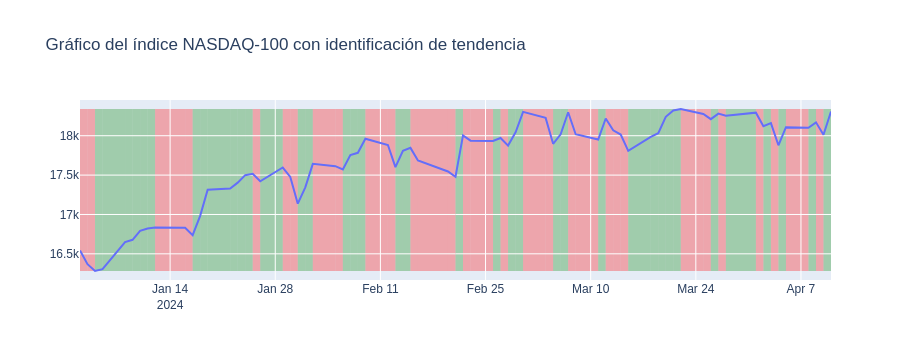

In [4]:
import datetime
import plotly.graph_objects as go
import yfinance as yf

# Importar los datos financieros del índice NASDAQ-100
nasdaq_100 = yf.download("^NDX", start="2024-01-01", end=datetime.datetime.now())

# Mostrar los últimos datos descargados
print("Últimos datos descargados del índice NASDAQ-100:")
print(nasdaq_100.tail())

# Función para identificar la tendencia
def identificar_tendencia(data):
    tendencia = []
    for i in range(1, len(data)):
        if data['Close'][i] > data['Close'][i-1]:
            tendencia.append("subida")
        elif data['Close'][i] < data['Close'][i-1]:
            tendencia.append("bajada")
        else:
            tendencia.append("sin cambios")
    return tendencia

# Identificar la tendencia del índice NASDAQ-100
tendencia = identificar_tendencia(nasdaq_100)

# Crear una figura para el gráfico
fig = go.Figure()

# Agregar la serie de tiempo de cierre al gráfico
fig.add_trace(go.Scatter(x=nasdaq_100.index, y=nasdaq_100['Close'], mode='lines', name='Cierre'))

# Resaltar los períodos de subida y bajada en el gráfico
for i in range(1, len(nasdaq_100)):
    if tendencia[i-1] == "subida":
        fig.add_shape(type="rect", x0=nasdaq_100.index[i-1], y0=min(nasdaq_100['Close']), x1=nasdaq_100.index[i], y1=max(nasdaq_100['Close']),
                      line=dict(color="green", width=0), fillcolor="green", opacity=0.3, layer="below")
    elif tendencia[i-1] == "bajada":
        fig.add_shape(type="rect", x0=nasdaq_100.index[i-1], y0=min(nasdaq_100['Close']), x1=nasdaq_100.index[i], y1=max(nasdaq_100['Close']),
                      line=dict(color="red", width=0), fillcolor="red", opacity=0.3, layer="below")

# Agregar un título al gráfico
fig.update_layout(title_text="Gráfico del índice NASDAQ-100 con identificación de tendencia")

# Mostrar el gráfico
fig.show()


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener datos históricos de precios del índice AUS200
data = yf.download("^AXJO", start="2023-01-01", end="2024-01-01")

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Crear secuencias de datos
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, 0])
        y.append(data[i+sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Dividir datos en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Agregar modelos de regresión
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Entrenar y evaluar modelos de regresión
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")

    # Predicción de la tendencia
    trend_prediction = "Subirá" if y_pred[-1] > y_pred[-2] else "Bajará"
    print(f"Predicción de la tendencia con {name}: {trend_prediction}")


[*********************100%%**********************]  1 of 1 completed


Random Forest MSE: 0.009697389338240716
Predicción de la tendencia con Random Forest: Bajará
Linear Regression MSE: 0.0034734693654823925
Predicción de la tendencia con Linear Regression: Subirá
SVR MSE: 0.03432325262826855
Predicción de la tendencia con SVR: Subirá
KNeighbors MSE: 0.016150030891986668
Predicción de la tendencia con KNeighbors: Subirá
Decision Tree MSE: 0.01300804830371376
Predicción de la tendencia con Decision Tree: Subirá
Gradient Boosting MSE: 0.009497790610264909
Predicción de la tendencia con Gradient Boosting: Subirá


In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Obtener datos históricos de precios del índice NASDAQ-100
nasdaq_100 = yf.download("^NDX", start="2023-10-01", end="2024-04-12")

# Calcular la variación del precio con respecto al periodo anterior
nasdaq_100['Price_Change'] = nasdaq_100['Close'].diff()

# Definir la variable objetivo (tendencia)
nasdaq_100['Trend'] = np.where(nasdaq_100['Price_Change'] > 0, 1, 0)

# Seleccionar características relevantes
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Normalizar los datos
scaler = MinMaxScaler()
nasdaq_100[features] = scaler.fit_transform(nasdaq_100[features])

# Definir las variables predictoras (X) y la variable objetivo (y)
X = nasdaq_100[features]
y = nasdaq_100['Trend']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de clasificación aleatoria
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[*********************100%%**********************]  1 of 1 completed


Accuracy: 0.5925925925925926


[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_23034/2869652031.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_23034/2869652031.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Últimos datos descargados del NAS30:
                    Open          High           Low         Close  \
Date                                                                 
2024-04-05  17940.279297  18202.960938  17912.859375  18108.460938   
2024-04-08  18130.439453  18178.660156  18050.689453  18100.189453   
2024-04-09  18188.869141  18210.019531  17973.070312  18169.900391   
2024-04-10  17957.960938  18040.830078  17932.419922  18011.660156   
2024-04-11  18085.109375  18337.150391  17998.250000  18307.980469   

               Adj Close      Volume  
Date                                  
2024-04-05  18108.460938  4578130000  
2024-04-08  18100.189453  4386700000  
2024-04-09  18169.900391  4869190000  
2024-04-10  18011.660156  5308250000  
2024-04-11  18307.980469  4714750000  


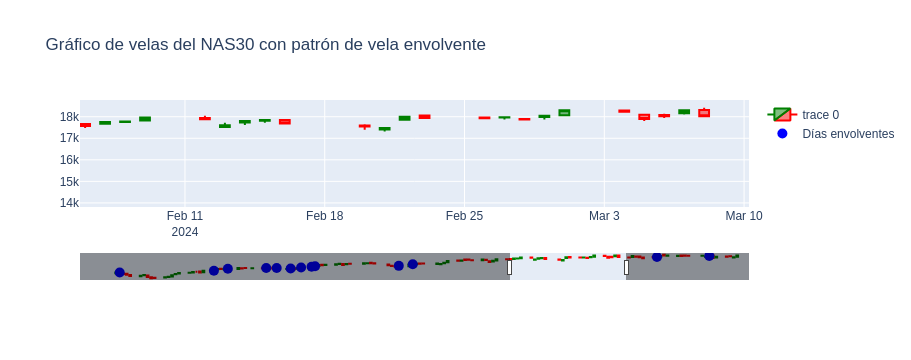

In [27]:
import datetime
import plotly.graph_objects as go
import yfinance as yf

# Obtener los datos históricos del NAS30
nasdaq_30 = yf.download("^NDX", start=datetime.datetime.now() - datetime.timedelta(days=180), end=datetime.datetime.now())

# Mostrar los últimos datos descargados
print("Últimos datos descargados del NAS30:")
print(nasdaq_30.tail())

# Función para identificar patrón de vela envolvente
def encontrar_vela_envolvente(data):
    dias_envolventes = []
    for i in range(1, len(data)):
        if (data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and
            data['Close'][i] > data['Open'][i] and data['Open'][i] < data['Close'][i-1]):
            dias_envolventes.append(data.index[i])
    return dias_envolventes

# Encontrar días con patrón de vela envolvente
dias_envolventes = encontrar_vela_envolvente(nasdaq_30)

# Configurar la vela
candlestick = go.Candlestick(
    x=nasdaq_30.index,
    open=nasdaq_30["Open"],
    high=nasdaq_30["High"],
    low=nasdaq_30["Low"],
    close=nasdaq_30["Close"],
    increasing=dict(line=dict(color="green")),
    decreasing=dict(line=dict(color="red"))
)

# Crear el gráfico de Velas
fig = go.Figure(data=[candlestick])

# Resaltar los días con patrón de vela envolvente
fig.add_trace(go.Scatter(x=dias_envolventes, y=[nasdaq_30.loc[date]['High'] for date in dias_envolventes],
                         mode="markers", marker=dict(color="blue", size=10), name="Días envolventes"))

# Agregar un título al gráfico
fig.update_layout(title_text="Gráfico de velas del NAS30 con patrón de vela envolvente")

# Mostrar el gráfico
fig.show()


[*********************100%%**********************]  1 of 1 completed

Últimos datos descargados del NAS30:
                    Open          High           Low         Close  \
Date                                                                 
2024-04-05  17940.279297  18202.960938  17912.859375  18108.460938   
2024-04-08  18130.439453  18178.660156  18050.689453  18100.189453   
2024-04-09  18188.869141  18210.019531  17973.070312  18169.900391   
2024-04-10  17957.960938  18040.830078  17932.419922  18011.660156   
2024-04-11  18085.109375  18337.150391  17998.250000  18307.980469   

               Adj Close      Volume  
Date                                  
2024-04-05  18108.460938  4578130000  
2024-04-08  18100.189453  4386700000  
2024-04-09  18169.900391  4869190000  
2024-04-10  18011.660156  5308250000  
2024-04-11  18307.980469  4714750000  



/tmp/ipykernel_23034/2869652031.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_23034/2869652031.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



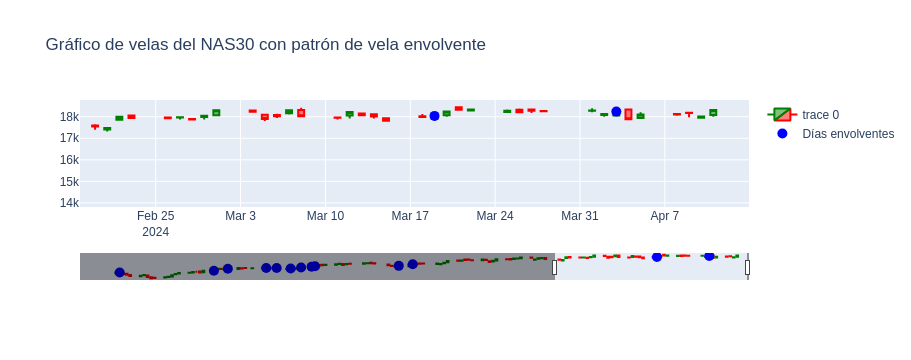

In [28]:
import datetime
import plotly.graph_objects as go
import yfinance as yf

# Obtener los datos históricos del NAS30
nasdaq_30 = yf.download("^NDX", start=datetime.datetime.now() - datetime.timedelta(days=180), end=datetime.datetime.now())

# Mostrar los últimos datos descargados
print("Últimos datos descargados del NAS30:")
print(nasdaq_30.tail())

# Función para identificar patrón de vela envolvente
def encontrar_vela_envolvente(data):
    dias_envolventes = []
    for i in range(1, len(data)):
        if (data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and
            data['Close'][i] > data['Open'][i] and data['Open'][i] < data['Close'][i-1]):
            dias_envolventes.append(data.index[i])
    return dias_envolventes

# Encontrar días con patrón de vela envolvente
dias_envolventes = encontrar_vela_envolvente(nasdaq_30)

# Configurar la vela
candlestick = go.Candlestick(
    x=nasdaq_30.index,
    open=nasdaq_30["Open"],
    high=nasdaq_30["High"],
    low=nasdaq_30["Low"],
    close=nasdaq_30["Close"],
    increasing=dict(line=dict(color="green")),
    decreasing=dict(line=dict(color="red"))
)

# Crear el gráfico de Velas
fig = go.Figure(data=[candlestick])

# Resaltar los días con patrón de vela envolvente
fig.add_trace(go.Scatter(x=dias_envolventes, y=[nasdaq_30.loc[date]['High'] for date in dias_envolventes],
                         mode="markers", marker=dict(color="blue", size=10), name="Días envolventes"))

# Agregar un título al gráfico
fig.update_layout(title_text="Gráfico de velas del NAS30 con patrón de vela envolvente")

# Mostrar el gráfico
fig.show()


[*********************100%%**********************]  1 of 1 completed


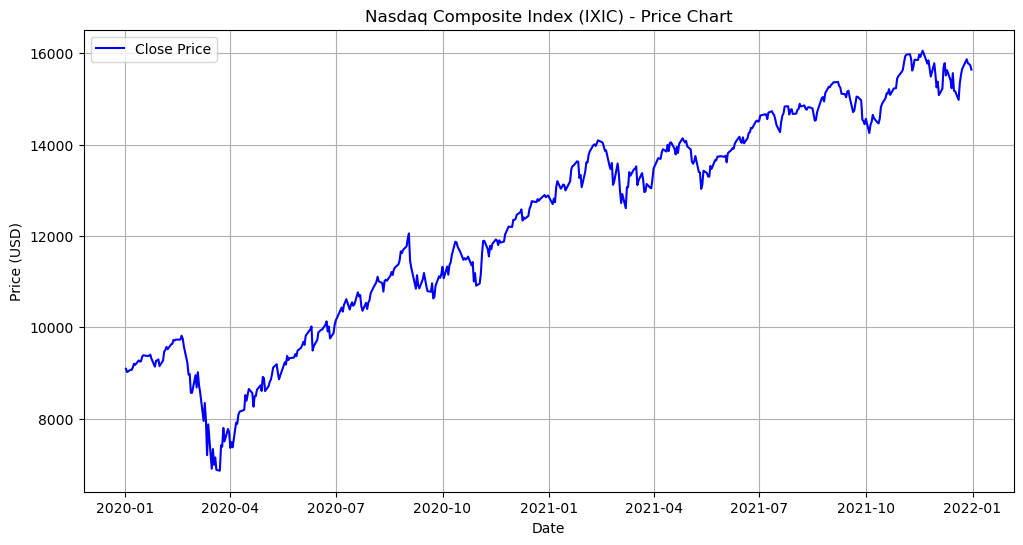

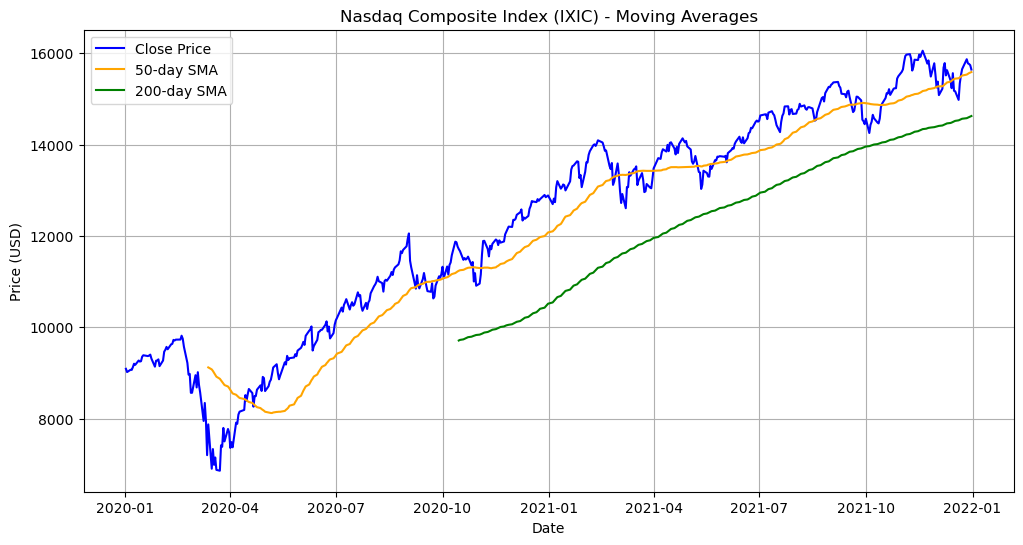

In [68]:
import datetime
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener datos históricos del Nasdaq Composite Index (IXIC)
def fetch_nasdaq_data(start_date, end_date):
    try:
        nasdaq_data = yf.download('^IXIC', start=start_date, end=end_date)
        return nasdaq_data
    except Exception as e:
        print(f"Error al obtener los datos: {e}")
        return None

# Función para trazar gráfico de precios del Nasdaq Composite Index (IXIC)
def plot_price_chart(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title('Nasdaq Composite Index (IXIC) - Price Chart')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Función para calcular y trazar gráfico de medias móviles
def plot_moving_averages(data, short_window=50, long_window=200):
    short_rolling = data['Close'].rolling(window=short_window).mean()
    long_rolling = data['Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(short_rolling.index, short_rolling, label=f'{short_window}-day SMA', color='orange')
    plt.plot(long_rolling.index, long_rolling, label=f'{long_window}-day SMA', color='green')
    plt.title('Nasdaq Composite Index (IXIC) - Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Función para obtener información financiera fundamental del Nasdaq Composite Index (IXIC)
def get_fundamental_info():
    # Aquí puedes usar APIs de terceros o bibliotecas para obtener datos fundamentales
    # Esto puede incluir estados financieros, ratios financieros, información sobre empresas, etc.
    pass

# Función para analizar datos fundamentales
def analyze_fundamental_data(data):
    # Aquí puedes realizar análisis fundamental utilizando los datos obtenidos
    pass

# Función principal
def main():
    # Definir fechas de inicio y fin para obtener datos históricos
    start_date = datetime.datetime(2020, 1, 1)
    end_date = datetime.datetime(2022, 1, 1)

    # Obtener datos históricos del Nasdaq Composite Index (IXIC)
    nasdaq_data = fetch_nasdaq_data(start_date, end_date)

    if nasdaq_data is not None:
        # Trazar gráfico de precios
        plot_price_chart(nasdaq_data)

        # Calcular y trazar gráfico de medias móviles
        plot_moving_averages(nasdaq_data)

        # Obtener información financiera fundamental
        fundamental_info = get_fundamental_info()

        # Analizar datos fundamentales
        analyze_fundamental_data(fundamental_info)

if __name__ == "__main__":
    main()


In [10]:
#random forest
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import datetime

# Función para obtener datos de Alpha Vantage hasta la hora actual
def fetch_data(symbol, api_key, start_date=None, end_date=None, interval='1min'):
    if start_date is None:
        start_date = datetime.datetime.now().strftime('%Y-%m-%d')
    if end_date is None:
        end_date = datetime.datetime.now().strftime('%Y-%m-%d')
        
    # Aquí va la lógica para obtener los datos en tiempo real utilizando la API de Alpha Vantage
    # Puedes usar la biblioteca requests para hacer la solicitud a la API y procesar la respuesta
    # Te recomiendo consultar la documentación de Alpha Vantage para conocer los detalles de cómo hacer la solicitud
    
    # Implementación de la función...
    pass


# Función para convertir los datos en un formato adecuado para el modelo
def preprocess_data(data):
    X = []
    y = []

    # Convertir los datos en listas de características (X) y objetivos (y)
    for timestamp, values in data.items():
        open_price = float(values['1. open'])
        high_price = float(values['2. high'])
        low_price = float(values['3. low'])
        close_price = float(values['4. close'])
        volume = float(values['5. volume'])

        # Aquí puedes calcular cualquier otra característica que desees utilizar
        # Por ejemplo, puedes calcular el cambio de precio respecto al precio de cierre anterior

        X.append([open_price, high_price, low_price, close_price, volume])
        # Aquí puedes decidir si el precio subió o bajó en el siguiente periodo de tiempo
        # Por ejemplo, si el precio en el siguiente intervalo es mayor que el precio actual, y.append(1), de lo contrario y.append(0)
    
    return np.array(X), np.array(y)

# Ejemplo de uso:
symbol = 'AAPL'  # Ejemplo de símbolo de Apple
api_key = 'YYYC6JRUF7KDUUZR'  # Reemplaza 'TU_CLAVE_API' por tu clave de API de Alpha Vantage

# Obtener los datos en tiempo real
data = fetch_data(symbol, api_key, start_date='2022-01-01', interval='1min')

# Preprocesar los datos
X, y = preprocess_data(data)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_classifier.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo:", accuracy)


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
#Support Vector Machines (SVM)
from sklearn.svm import SVC

# Crear el clasificador SVM
svm_classifier = SVC(kernel='rbf', random_state=42)

# Entrenar el modelo
svm_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_svm = svm_classifier.predict(X_test)



In [ ]:
#Redes Neuronales
from sklearn.neural_network import MLPClassifier

# Crear el clasificador de Redes Neuronales
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Entrenar el modelo
nn_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_nn = nn_classifier.predict(X_test)
